Plant Disease Prediction MobileNetV1 Last ten epochs.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to system RAM
train_batchsize = 64
val_batchsize = 54
 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Bihar_Crops/train',
        target_size=(224,224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Bihar_Crops/valid',
        target_size=(224,224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 31373 images belonging to 17 classes.
Found 7811 images belonging to 17 classes.


In [ ]:
train_generator.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Early_blight': 8,
 'Tomato___Late_blight': 9,
 'Tomato___Leaf_Mold': 10,
 'Tomato___Septoria_leaf_spot': 11,
 'Tomato___Spider_mites Two-spotted_spider_mite': 12,
 'Tomato___Target_Spot': 13,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 14,
 'Tomato___Tomato_mosaic_virus': 15,
 'Tomato___healthy': 16}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
xcep = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224, 3)) 

17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model1 = models.Sequential()
 
model1.add(xcep)
# Add new layers
model1.add(layers.Flatten())
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(17, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50176)             200704    
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50176)             200704    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 17)                8

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:
# At first we tried several pre-trained models like MobileNetV2, NasNetMobile and MobileNetV1. 
# After having look at the models we found that MobileNetV1 provided the best accuracy without overfitting or underfitting.  
# Loading the model that we have previously trained Model with 20 epoch 
model1 = tensorflow.keras.models.load_model('/content/drive/My Drive/SIH_colab_notebooks/pd_mnv1_1.h5')


In [ ]:
# Train the model
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
491/490 [==============================] - 463s 942ms/step - loss: 0.1301 - acc: 0.9569 - val_loss: 0.0836 - val_acc: 0.9752
Epoch 2/10
491/490 [==============================] - 462s 941ms/step - loss: 0.1152 - acc: 0.9610 - val_loss: 0.0791 - val_acc: 0.9755
Epoch 3/10
491/490 [==============================] - 462s 941ms/step - loss: 0.1130 - acc: 0.9622 - val_loss: 0.0782 - val_acc: 0.9770
Epoch 4/10
491/490 [==============================] - 460s 936ms/step - loss: 0.1054 - acc: 0.9656 - val_loss: 0.0697 - val_acc: 0.9798
Epoch 5/10
491/490 [==============================] - 460s 937ms/step - loss: 0.0987 - acc: 0.9676 - val_loss: 0.0697 - val_acc: 0.9799
Epoch 6/10
491/490 [==============================] - 459s 935ms/step - loss: 0.0946 - acc: 0.9693 - val_loss: 0.0693 - val_acc: 0.9779
Epoch 7/10
491/490 [==============================] - 460s 937ms/step - loss: 0.0896 - acc: 0.9696 - val_loss: 0.0669 - val_acc: 0.9804
Epoch 8/10
491/490 [============================

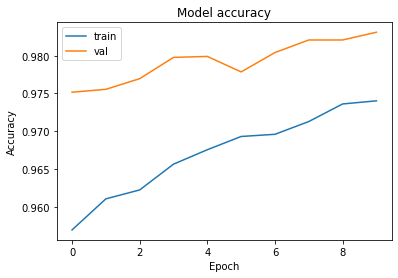

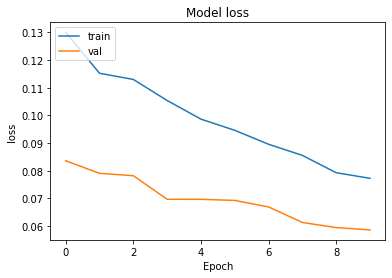

In [ ]:
import matplotlib.pyplot as plt

# training and accuracy value
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model1.save('/content/drive/My Drive/SIH_colab_notebooks/pd_mnv1_2.h5')

In [ ]:
import cv2
from tensorflow import keras
#Loading the model again for testing purposes
model1=keras.models.load_model('/content/drive/My Drive/SIH_colab_notebooks/sih_pd_mnv1_1/last_10_epoch/pd_mnv1_2.h5', compile=True)

In [ ]:
diseases=['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/PotatoEarlyBlight1.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Potato___Early_blight


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/self_potato.jpeg')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Potato___healthy


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/PotatoHealthy1.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Potato___healthy


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/valid/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Early_blight


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/TomatoEarlyBlight6.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Early_blight


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/TomatoBacterialSpot.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Bacterial_spot


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/self_tomato_qwerty.jpeg')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Late_blight


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/self_tomato_dry.jpeg')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Early_blight


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/valid/Tomato___Septoria_leaf_spot/021f9747-f308-4694-859b-10f541a0e63c___JR_Sept.L.S 2506.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Septoria_leaf_spot


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/valid/Tomato___Septoria_leaf_spot/02d2c484-8bdb-4ef2-8d07-0bdb3ac330cc___Matt.S_CG 0975.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Tomato___Septoria_leaf_spot


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/self_corn(maize).jpeg')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Corn_(maize)___healthy


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/self_corn(maize)_1.jpeg')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
import numpy as np
img = cv2.imread('/content/drive/My Drive/Bihar_Crops/test/CornCommonRust1.JPG')
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])
img4=img4/255.0
disease = model1.predict_classes(img4)
print(diseases[disease[0]])

Corn_(maize)___Common_rust
